# Google Play Store Data Analysis

## Objectives
In this analysis, we aim to:
1. Explore the dataset structure (rows, columns, data types, memory).
2. Clean and preprocess the data where needed.
3. Answer specific analytical questions, such as:
   - How many apps are there in the store?
   - Which categories get the highest ratings?
   - Which apps have the most reviews or installs?
4. Visualize key insights using Matplotlib & Seaborn.

---

## Step 1: Load and Inspect the Data

In [1]:
# Setting the working directory to the project folder
import os
os.chdir("D:/Data Analysis Project/GooglePlayStore-Analysis")  # Use forward slashes for Windows paths

# Importing essential libraries for data analysis and visualization

In [2]:
import pandas as pd       # For loading, cleaning, and analyzing data
import numpy as np        # For numerical computations
import matplotlib.pyplot as plt   # For basic visualizations
import seaborn as sns     # For advanced and beautiful plots

# Loading the dataset into a Pandas DataFrame
# Using read_csv since the dataset is in CSV format

In [3]:
data = pd.read_csv("data/googleplaystore.csv")

# Q1: Find total number of apps in Google Play Store

In [4]:
# .shape[0] gives the number of rows = total number of apps
total_apps = data.shape[0]
print("Total number of apps in the Google Play Store dataset:", total_apps)

Total number of apps in the Google Play Store dataset: 10841


# Q2: Find total number of columns for each app

In [5]:
# .shape[1] gives the number of columns
total_columns = data.shape[1]
print("Total number of columns in the dataset:", total_columns)

Total number of columns in the dataset: 13


# Q3: Display the first 5 rows of the dataset

In [6]:
# .head() is a quick way to preview the dataset.
# By default, it shows the first 5 rows.
# This helps us:
# - Understand how the data looks (columns + sample values).
# - Spot potential issues (missing values, strange characters, etc.).
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Q4: Display the last 3 rows of the dataset

In [7]:
# .tail() works like .head(), but shows rows from the bottom.
# Adding a number (e.g., 3) tells Pandas how many rows we want.
# This helps verify if the dataset has consistent formatting till the end.
data.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# Q5: Get Information About the Dataset

In [8]:
# .info() provides:
# - Total number of rows and columns
# - Column names
# - Data types (int, float, object)
# - Non-null counts (helps detect missing values)
# - Memory usage (useful for large datasets)abs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Q6: Get statistical summary for numerical columns

In [9]:
# .describe() gives:
# - Count: number of non-null entries
# - Mean: average value
# - Std: standard deviation (spread)
# - Min, Max: range of values
# - 25%, 50%, 75%: quartiles (data distribution)
# This helps us understand basic patterns and spot outliers.
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Q7: Find total number of apps containing "Astrology" in their title

In [10]:
# Step 1: Use .str.contains() to search for "Astrology" in the 'App' column
# Step 2: Set case=False to make the search case-insensitive
# Step 3: Set na=False to avoid errors from missing values
# Step 4: Filter the DataFrame using this boolean mask
# Step 5: Use len() to count how many apps match
astrology_apps = data[data['App'].str.contains("Astrology", case=False, na=False)]
print("Total number of apps containing 'Astrology':", len(astrology_apps))
astrology_apps.head()  # Display first few matching apps

Total number of apps containing 'Astrology': 3


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1570,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143,11M,"10,000,000+",Free,0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
1592,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15M,"100,000+",Free,0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# Q8: Find the total number of unique categories in the dataset

In [11]:
# Step 1: Select the 'Category' column
# Step 2: Use .nunique() to count unique values in that column
# This tells us how many different app categories exist in the dataset.
unique_categories = data['Category'].nunique()
print("Total number of unique categories:", unique_categories)

Total number of unique categories: 34


# Q9: Find which category has the highest average rating

In [12]:
# Step 1: Group the dataset by 'Category'
# Step 2: Select the 'Rating' column for each category
# Step 3: Use .mean() to calculate the average rating per category
# Step 4: Sort the results in descending order to find the highest-rated category
category_ratings = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Category with highest average rating:\n", category_ratings.head(1))

Category with highest average rating:
 Category
1.9    19.0
Name: Rating, dtype: float64


### At first, I jumped straight to using groupby("Category")["Rating"].mean().sort_values() to get the top-rated category. While it technically worked, it skipped an important step — I didn’t inspect the grouped data first. When I looped through each category using groupby(), I noticed anomalies like numeric “categories” and unrealistic ratings. This made me realize that inspecting groups before aggregation is crucial when working with messy, real-world data. After validating the groups, I then used groupby().mean() with sorting to get a clean and reliable list of categories by average rating.

In [13]:
# Step 1: Group the dataset by 'Category'
# Step 2: Loop through each group to see category names and their data
for category_name, group_data in data.groupby("Category"):
    print("Group Name:", category_name)   # Category name
    print("Group Information:")           # The apps in this category
    print(group_data)
    print("-" * 50)  # Separator for readability

# Step 3: Instead of manually looping, use .groupby() + .mean() to compute average ratings per category
# This is the cleanest way to get the average rating per category
category_avg_ratings = data.groupby("Category")["Rating"].mean()

# Step 4: Sort these averages to see which category has the highest average rating
highest_avg_rating = category_avg_ratings.sort_values(ascending=False)
print("Categories sorted by highest average rating:\n", highest_avg_rating)

Group Name: 1.9
Group Information:
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
--------------------------------------------------
Group Name: ART_AND_DESIGN
Group Information:
                                                    App        Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                   Coloring book moana  ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                 Sketch - Draw & Paint  ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
...                       

# Q10: Find total number of apps with a 5-star rating

In [14]:
# Step 1: Filter the dataset where 'Rating' equals 5
# Step 2: Use len() to count how many apps meet this condition
# This gives us the total number of apps with a perfect 5-star rating
five_star_apps = len(data[data['Rating'] == 5])

# Step 3: Print the result
print("Total number of apps with a 5-star rating:", five_star_apps)

Total number of apps with a 5-star rating: 274


# Q11: Find the average number of reviews

In [15]:
# Step 1: Check the data type of 'Reviews'
print("Current data type of Reviews column:", data['Reviews'].dtype)

# Step 2: Inspect some values to see if they are numeric or contain special characters
print("Sample values from Reviews column:\n", data['Reviews'].head(10))

# Step 3: Convert 'Reviews' to numeric
# If there are invalid strings (like '3.0M'), replace them or remove those rows
# errors='coerce' converts invalid values to NaN
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Step 4: Drop rows with NaN in 'Reviews' (optional, but ensures clean calculation)
data = data.dropna(subset=['Reviews'])

# Step 5: Calculate the average reviews using .mean()
average_reviews = data['Reviews'].mean()

# Step 6: Print the result
print("Average number of reviews:", average_reviews)

Current data type of Reviews column: object
Sample values from Reviews column:
 0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: object
Average number of reviews: 444152.89603321033


# Q12: Find total number of Free and Paid apps

In [17]:
# Step 1: Inspect the 'Type' column to confirm its values
print("Unique values in Type column:", data['Type'].unique())

# Step 2: Use value_counts() to count how many Free vs Paid apps exist
app_type_counts = data['Type'].value_counts()

# Step 3: Print the result
print("Total number of Free and Paid apps:\n", app_type_counts)

Unique values in Type column: ['Free' 'Paid' nan]
Total number of Free and Paid apps:
 Type
Free    10039
Paid      800
Name: count, dtype: int64


# Q13: Find the app with the maximum number of reviews

In [18]:
# Step 1: Find the maximum value in the 'Reviews' column
max_reviews = data['Reviews'].max()

# Step 2: Filter the dataset for the app(s) that have this maximum number of reviews
most_reviewed_app = data[data['Reviews'] == max_reviews]

# Step 3: Print the details of the app(s) with the maximum reviews
print("App(s) with the maximum number of reviews:\n", most_reviewed_app[['App', 'Reviews']])

App(s) with the maximum number of reviews:
            App     Reviews
2544  Facebook  78158306.0


# Q14: Display the top 5 apps having the highest reviews

In [19]:
# Step 1: Sort the dataset by 'Reviews' in descending order
sorted_by_reviews = data.sort_values(by='Reviews', ascending=False)

# Step 2: Select the top 5 apps after sorting
top_5_reviewed_apps = sorted_by_reviews[['App', 'Reviews']].head(5)

# Step 3: Print the result
print("Top 5 apps with the highest number of reviews:\n", top_5_reviewed_apps)

Top 5 apps with the highest number of reviews:
                      App     Reviews
2544            Facebook  78158306.0
3943            Facebook  78128208.0
381   WhatsApp Messenger  69119316.0
336   WhatsApp Messenger  69119316.0
3904  WhatsApp Messenger  69109672.0


# Q15: Find the average rating of Free and Paid apps

In [20]:
# Step 1: Group the dataset by 'Type' (Free vs Paid)
# Step 2: Select the 'Rating' column for each group
# Step 3: Use mean() to calculate the average rating for each type
average_rating_by_type = data.groupby('Type')['Rating'].mean()

# Step 4: Print the result
print("Average rating of Free vs Paid apps:\n", average_rating_by_type)

Average rating of Free vs Paid apps:
 Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64


# Q16: Find the top 5 apps with maximum installs

In [21]:
# Step 1: Remove '+' and ',' characters from 'Installs' and convert to integer
data['Installs'] = data['Installs'].str.replace('+', '', regex=False)
data['Installs'] = data['Installs'].str.replace(',', '', regex=False)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Step 2: Sort the dataset by 'Installs' in descending order
sorted_by_installs = data.sort_values(by='Installs', ascending=False)

# Step 3: Select the top 5 apps after sorting
top_5_installed_apps = sorted_by_installs[['App', 'Installs']].head(5)

# Step 4: Print the result
print("Top 5 apps with maximum installs:\n", top_5_installed_apps)

Top 5 apps with maximum installs:
                             App    Installs
2808              Google Photos  1000000000
2853              Google Photos  1000000000
3223  Maps - Navigate & Explore  1000000000
3117  Maps - Navigate & Explore  1000000000
3234                     Google  1000000000


C:\Temp\ipykernel_24100\604409370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].str.replace('+', '', regex=False)
C:\Temp\ipykernel_24100\604409370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].str.replace(',', '', regex=False)
C:\Temp\ipykernel_24100\604409370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# Q17: Distribution of App Ratings

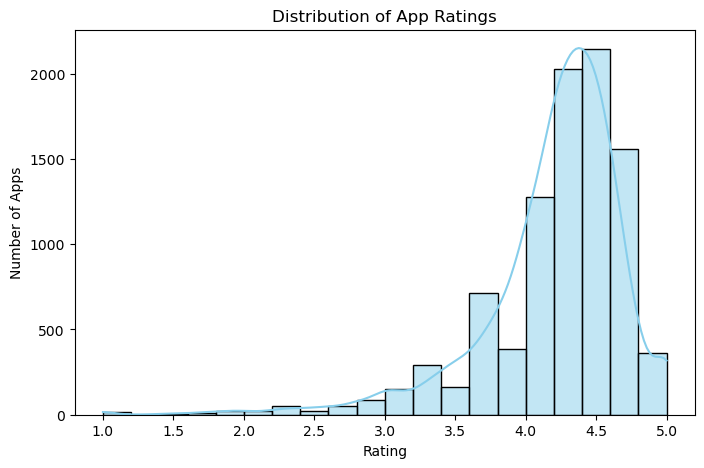

In [23]:
# Step 1: Plot a histogram to visualize the distribution of app ratings
# histplot() shows how frequently each rating value occurs
plt.figure(figsize=(8,5))
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')

# Step 2: Add chart details for readability
plt.title('Distribution of App Ratings')  # Chart title
plt.xlabel('Rating')  # X-axis label
plt.ylabel('Number of Apps')  # Y-axis label
plt.show()

# Q18: Number of Apps per Category

C:\Temp\ipykernel_24100\875651878.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Spectral")  # Spectral = bright rainbow palette


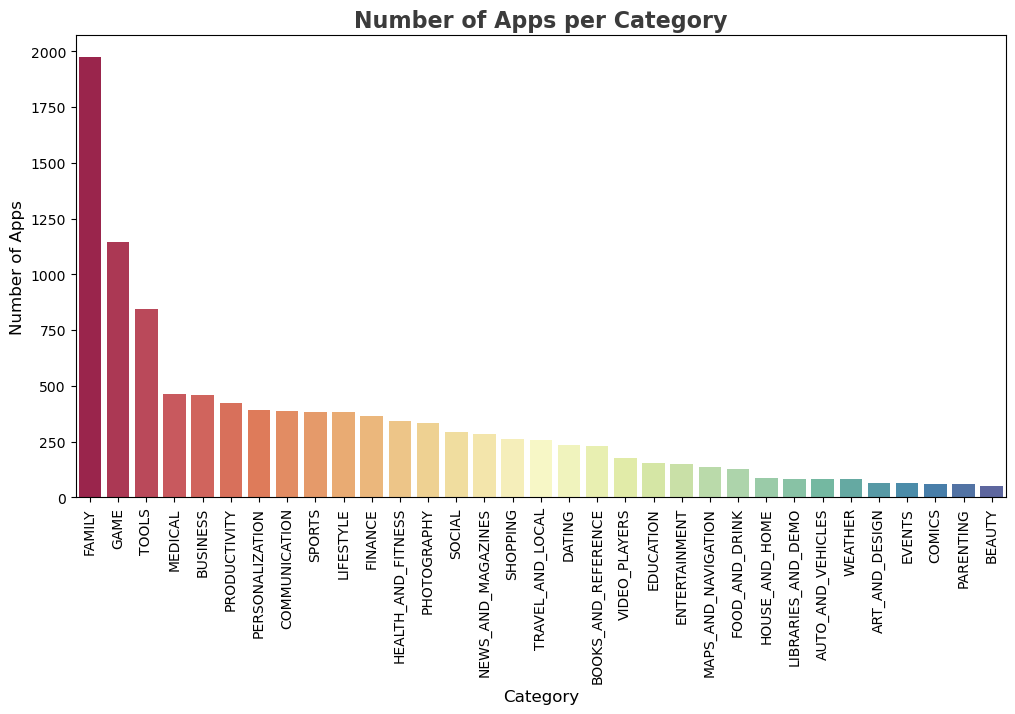

In [25]:
# Step 1: Count the number of apps per category using value_counts()
category_counts = data['Category'].value_counts()

# Step 2: Plot a colorful bar chart with a bright, cheerful palette
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Spectral")  # Spectral = bright rainbow palette

# Step 3: Add chart details
plt.title('Number of Apps per Category', fontsize=16, fontweight='bold', color='#3b3b3b')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Q19: Average Rating per Category

C:\Temp\ipykernel_24100\1791643061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_category.values,


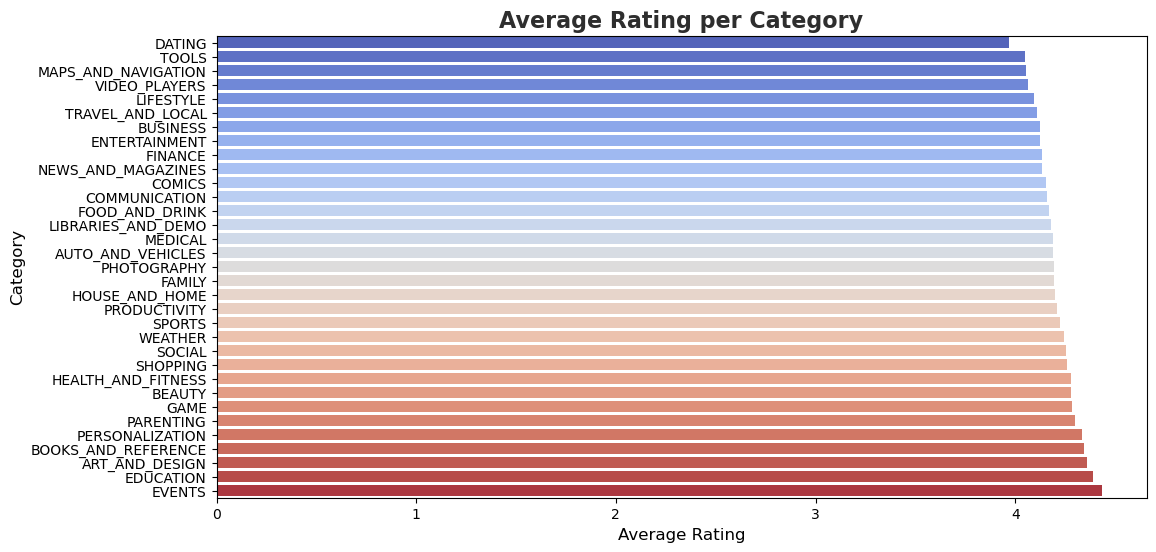

In [26]:
# Step 1: Group by 'Category' and calculate average rating using mean()
avg_rating_per_category = data.groupby('Category')['Rating'].mean().sort_values()

# Step 2: Plot a horizontal bar chart with a bright, cheerful palette
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_per_category.values, 
            y=avg_rating_per_category.index, 
            palette="coolwarm")  # coolwarm gives a smooth gradient of warm & cool colors

# Step 3: Add chart details
plt.title('Average Rating per Category', fontsize=16, fontweight='bold', color='#2e2e2e')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

# Q20: Free vs Paid Apps Count

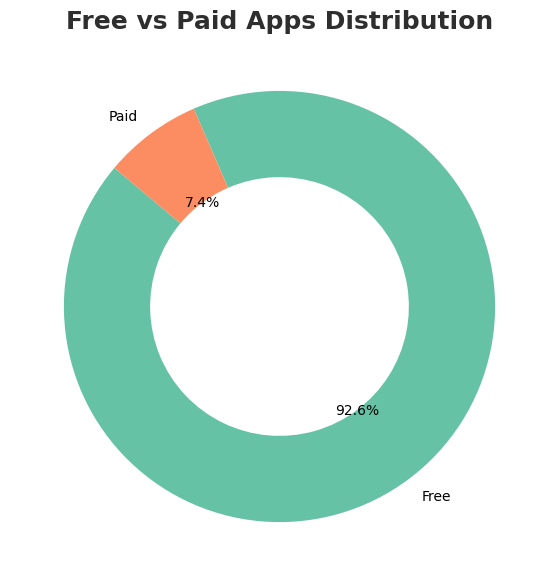

In [27]:
# Step 1: Count Free vs Paid apps using value_counts()
app_type_counts = data['Type'].value_counts()  
# value_counts() → Counts unique values in the 'Type' column (Free vs Paid)

# Step 2: Create a donut chart (pie chart with a hole in the center)
plt.figure(figsize=(7,7))  
# figure(figsize) → Sets the chart size for better visibility

colors = sns.color_palette("Set2")  
# sns.color_palette("Set2") → Loads a soft, pastel color set (aesthetically pleasing)

plt.pie(app_type_counts, 
        labels=app_type_counts.index,  
        # labels → Uses 'Free' and 'Paid' as slice labels
        autopct='%1.1f%%',  
        # autopct → Displays percentages on each slice (formatted to 1 decimal place)
        startangle=140,  
        # startangle → Rotates the chart for better alignment
        colors=colors,  
        # colors → Assigns the chosen soft palette to slices
        wedgeprops=dict(width=0.4))  
        # wedgeprops width → Creates the donut effect by making a hole in the center

# Step 3: Add chart details
plt.title('Free vs Paid Apps Distribution', fontsize=18, fontweight='bold', color='#2e2e2e')  
# title() → Adds a bold title with custom size & color

plt.show()  
# show() → Displays the chart

# Q21: Free vs Paid Apps Average Rating

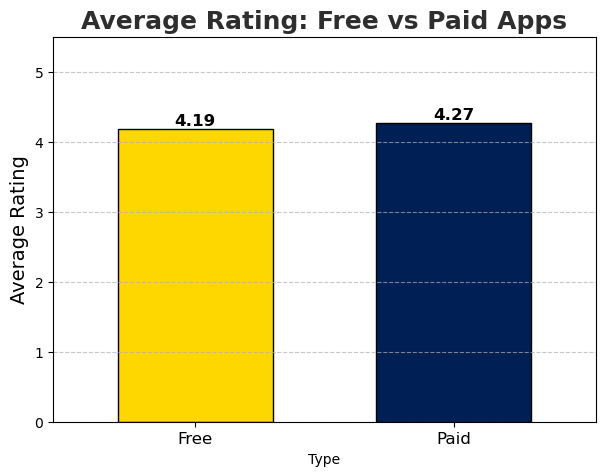

In [28]:
# Step 1: Group by 'Type' (Free vs Paid) and calculate average rating
avg_rating_by_type = data.groupby('Type')['Rating'].mean()
# groupby('Type') → Groups apps into Free & Paid
# ['Rating'].mean() → Calculates average rating for each group

# Step 2: Create a bar chart with premium colors
plt.figure(figsize=(7,5))  # Set figure size
premium_colors = ['#FFD700', '#001F54']  # Gold (Paid) & Navy Blue (Free) = Premium color theme
avg_rating_by_type.plot(kind='bar', color=premium_colors, width=0.6, edgecolor='black')
# kind='bar' → Creates bar chart
# color → Applies custom premium colors
# edgecolor → Adds border for a sharp look

# Step 3: Add data labels on bars
for index, value in enumerate(avg_rating_by_type.values):
    plt.text(index, value + 0.05, round(value,2), ha='center', fontsize=12, fontweight='bold', color='black')
# text() → Adds value labels on top of each bar

# Step 4: Add chart details
plt.title('Average Rating: Free vs Paid Apps', fontsize=18, fontweight='bold', color='#2e2e2e')  
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Keep labels horizontal
plt.ylim(0,5.5)  # Ratings scale from 0–5
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines
plt.show()

# Q22: Distribution of Reviews

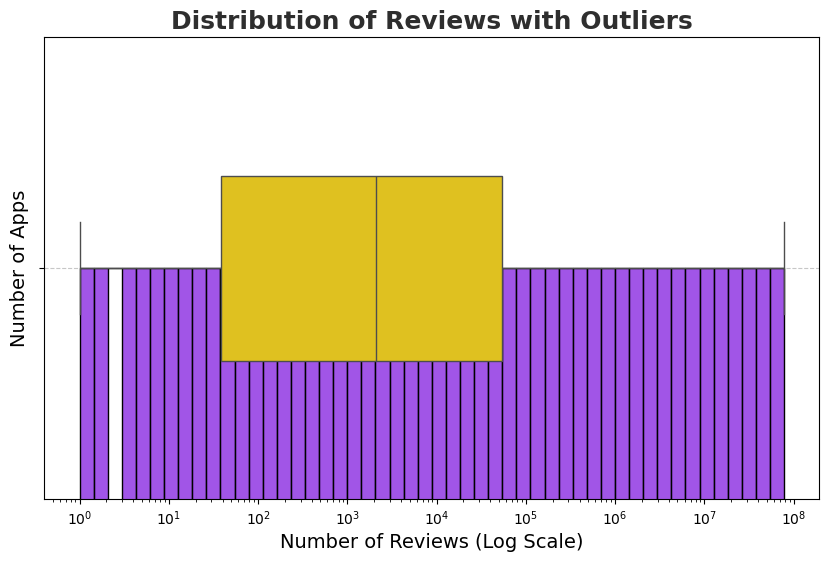

In [30]:
plt.figure(figsize=(10,6))  # Set figure size

# Step 1: Plot histogram for the distribution of reviews
sns.histplot(data['Reviews'], bins=50, log_scale=True, color='#8A2BE2', alpha=0.8)
# histplot() → Plots frequency distribution
# bins=50 → Divides data into 50 intervals
# log_scale=True → Uses logarithmic scale to handle skew (many small apps, few huge ones)
# color='#8A2BE2' → Premium bold purple
# alpha=0.8 → Adds transparency for layering

# Step 2: Overlay a boxplot at the bottom to spot outliers
sns.boxplot(x=data['Reviews'], color='#FFD700', width=0.4)
# boxplot() → Shows data spread & outliers
# color='#FFD700' → Gold overlay for contrast

# Step 3: Add chart details
plt.title('Distribution of Reviews with Outliers', fontsize=18, fontweight='bold', color='#2e2e2e')
plt.xlabel('Number of Reviews (Log Scale)', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Subtle horizontal gridlines
plt.show()

# Q23: Top 10 Apps by Installs 

C:\Temp\ipykernel_24100\2178370257.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Installs', y='App', data=top_10_apps, palette=neon_colors)
C:\Temp\ipykernel_24100\2178370257.py:10: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x='Installs', y='App', data=top_10_apps, palette=neon_colors)


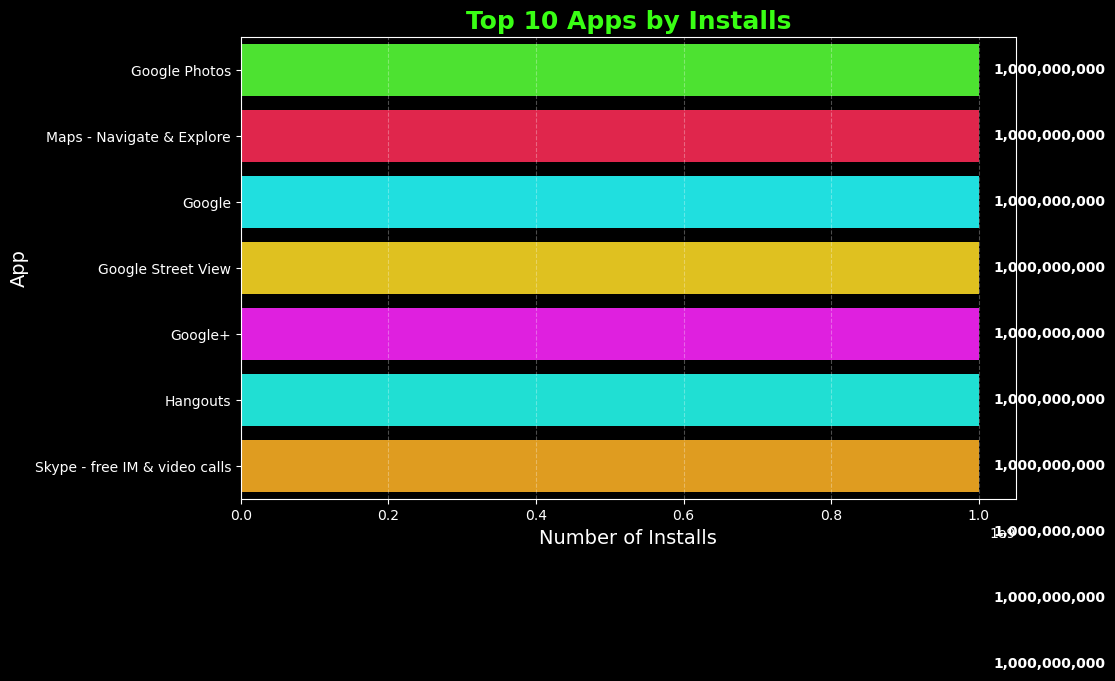

In [31]:
# Step 1: Sort dataset by 'Installs' in descending order and select top 10 apps
top_10_apps = data.sort_values(by='Installs', ascending=False).head(10)

# Step 2: Set dark background for neon effect
plt.style.use('dark_background')
plt.figure(figsize=(10,6))

# Step 3: Create horizontal bar plot with neon colors
neon_colors = ['#39FF14','#FF073A','#00FFFF','#FFD700','#FF00FF','#00FFEF','#FFA500','#ADFF2F','#FF4500','#1E90FF']
sns.barplot(x='Installs', y='App', data=top_10_apps, palette=neon_colors)

# Step 4: Add data labels for clarity
for index, value in enumerate(top_10_apps['Installs']):
    plt.text(value + (value*0.02), index, f'{value:,}', color='white', va='center', fontsize=10, fontweight='bold')

# Step 5: Add chart details
plt.title('Top 10 Apps by Installs', fontsize=18, fontweight='bold', color='#39FF14')  # Electric green title
plt.xlabel('Number of Installs', fontsize=14, color='white')
plt.ylabel('App', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

# Q24: Top 10 Categories by Installs (Lollipop Chart)

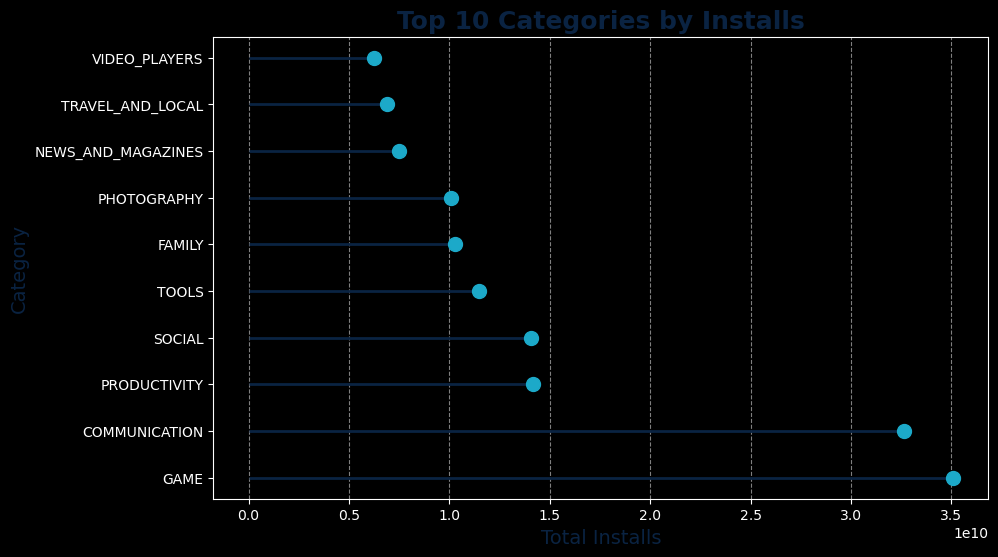

In [32]:
# Step 1: Group by Category and sum up installs, then get top 10
category_installs = data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Step 2: Prepare for lollipop chart
categories = category_installs.index
installs = category_installs.values

# Step 3: Plot lollipop chart (lines + dots)
plt.figure(figsize=(10,6))
plt.hlines(y=categories, xmin=0, xmax=installs, color='#0A2342', linewidth=2)  # Line = stem
plt.plot(installs, categories, 'o', color='#1CA9C9', markersize=10)  # Circle = lollipop head

# Step 4: Add chart details
plt.title('Top 10 Categories by Installs', fontsize=18, fontweight='bold', color='#0A2342')
plt.xlabel('Total Installs', fontsize=14, color='#0A2342')
plt.ylabel('Category', fontsize=14, color='#0A2342')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Q25: Relationship Between Reviews and Installs (Bubble Chart)

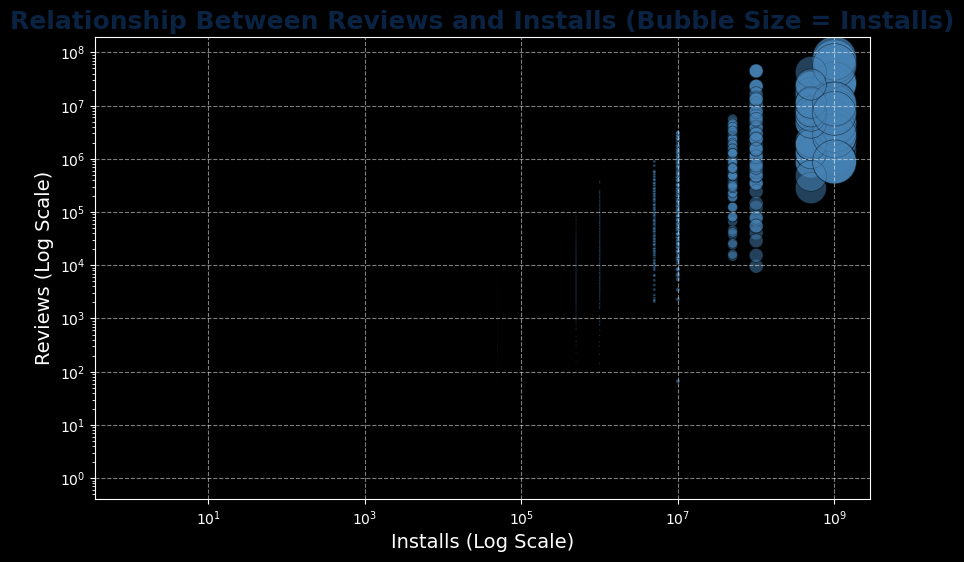

In [33]:
# Q25: Relationship Between Reviews and Installs (Bubble Chart)

plt.figure(figsize=(10,6))
sizes = data['Installs'] / 1000000  # Scale bubble size for better visibility

# Step 1: Bubble chart using scatter
plt.scatter(data['Installs'], data['Reviews'], 
            s=sizes, alpha=0.5, c='#4682B4', edgecolors='black', linewidth=0.5)

# Step 2: Log scale for skewed data
plt.xscale('log')
plt.yscale('log')

# Step 3: Add chart details
plt.title('Relationship Between Reviews and Installs (Bubble Size = Installs)', fontsize=18, fontweight='bold', color='#0A2342')
plt.xlabel('Installs (Log Scale)', fontsize=14)
plt.ylabel('Reviews (Log Scale)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Q26: Category Distribution of Apps 

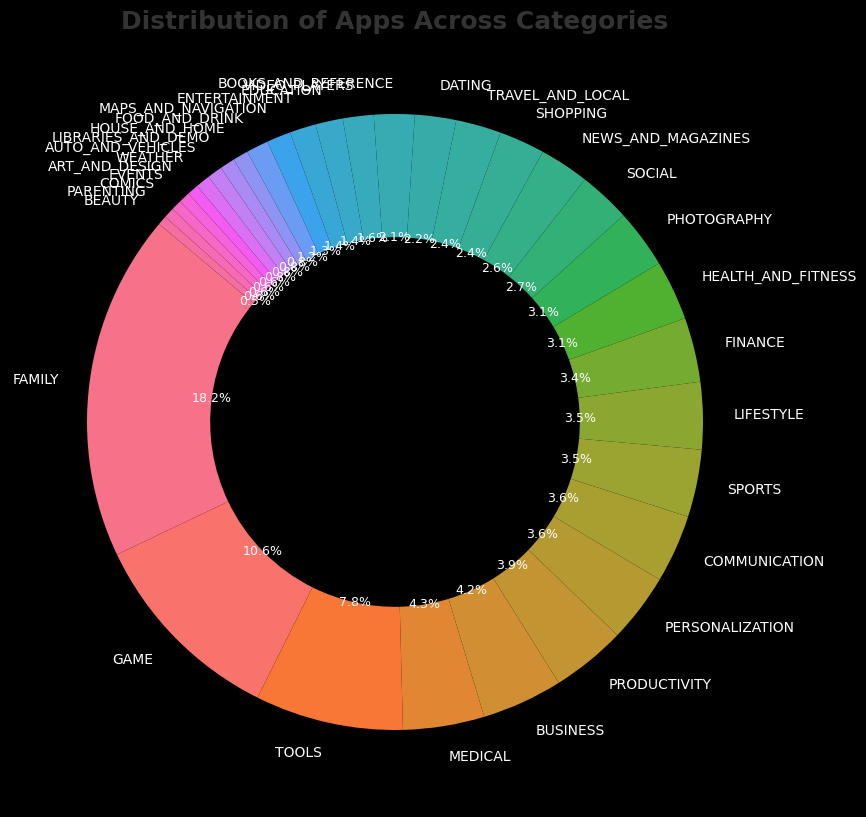

In [39]:
# Step 1: Count apps per category
category_counts = data['Category'].value_counts()

# Step 2: Define an aesthetic color palette
colors = sns.color_palette("husl", len(category_counts))  
# 'husl' → High-quality, evenly spaced colors (looks good even with many slices)

# Step 3: Create a donut pie chart
plt.figure(figsize=(10,10))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index,
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    wedgeprops=dict(width=0.4)  # Makes it a donut chart
)

# Step 4: Style the text for readability
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)

# Step 5: Add chart details
plt.title('Distribution of Apps Across Categories', fontsize=18, fontweight='bold', color='#333333')
plt.show()

In [40]:
import os
os.getcwd()


'D:\\Data Analysis Project\\GooglePlayStore-Analysis'